# Ensemble & Supervised Learning Project

### Data Description & Context:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

### Domain:
Medicine

### Attribute Information:
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 


### Objective:
Goal is to classify the patients into the respective labels using the attributes from their voice recordings

In [3]:
#Importing All the Libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
sns.set_style(style='darkgrid')  # Setting the plot style. Purely for aesthetic purposes
%matplotlib inline

In [4]:
#Read the data as 'Data' dataframe
Data = pd.read_csv('Data - Parkinsons')

In [5]:
#Reading the first five rows of dataset
Data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
#last 5 rows using tail() function
Data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


* All the columns seem to be numeric, although not necesarily continuous
* Let's check the datatypes, shape and number of missing values in the dataframe to see if there are read as numerical attributes

### Exploratory data analysis
- **Shape**
- **Meta info**
- **Descriptive stats**
- **Distributions**
- **Correlations**

In [7]:
#checking the shape of dataset. Dataset having 195 rows and 24 columns.
Data.shape

(195, 24)

In [8]:
#This shows data type of each attribute and number of value present in each attribute.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

* Dataset containing 23 columns, 'name' column giving index information and its type is object. All the columns in dataset having float data type except status.

In [9]:
#This is showing dataset having 147 possitive cases and 0 negative cases for Parkinson’s Disease.
Data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [10]:
#name column is just an index column we can drop this column
Data.drop('name',axis = 1, inplace = True)

In [11]:
# Checking Missing value present in the dataset. It seems that No missing data in the file 
Data.apply(lambda x : sum(x.isnull()))

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
# this function is showing 5 point summery of data.
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


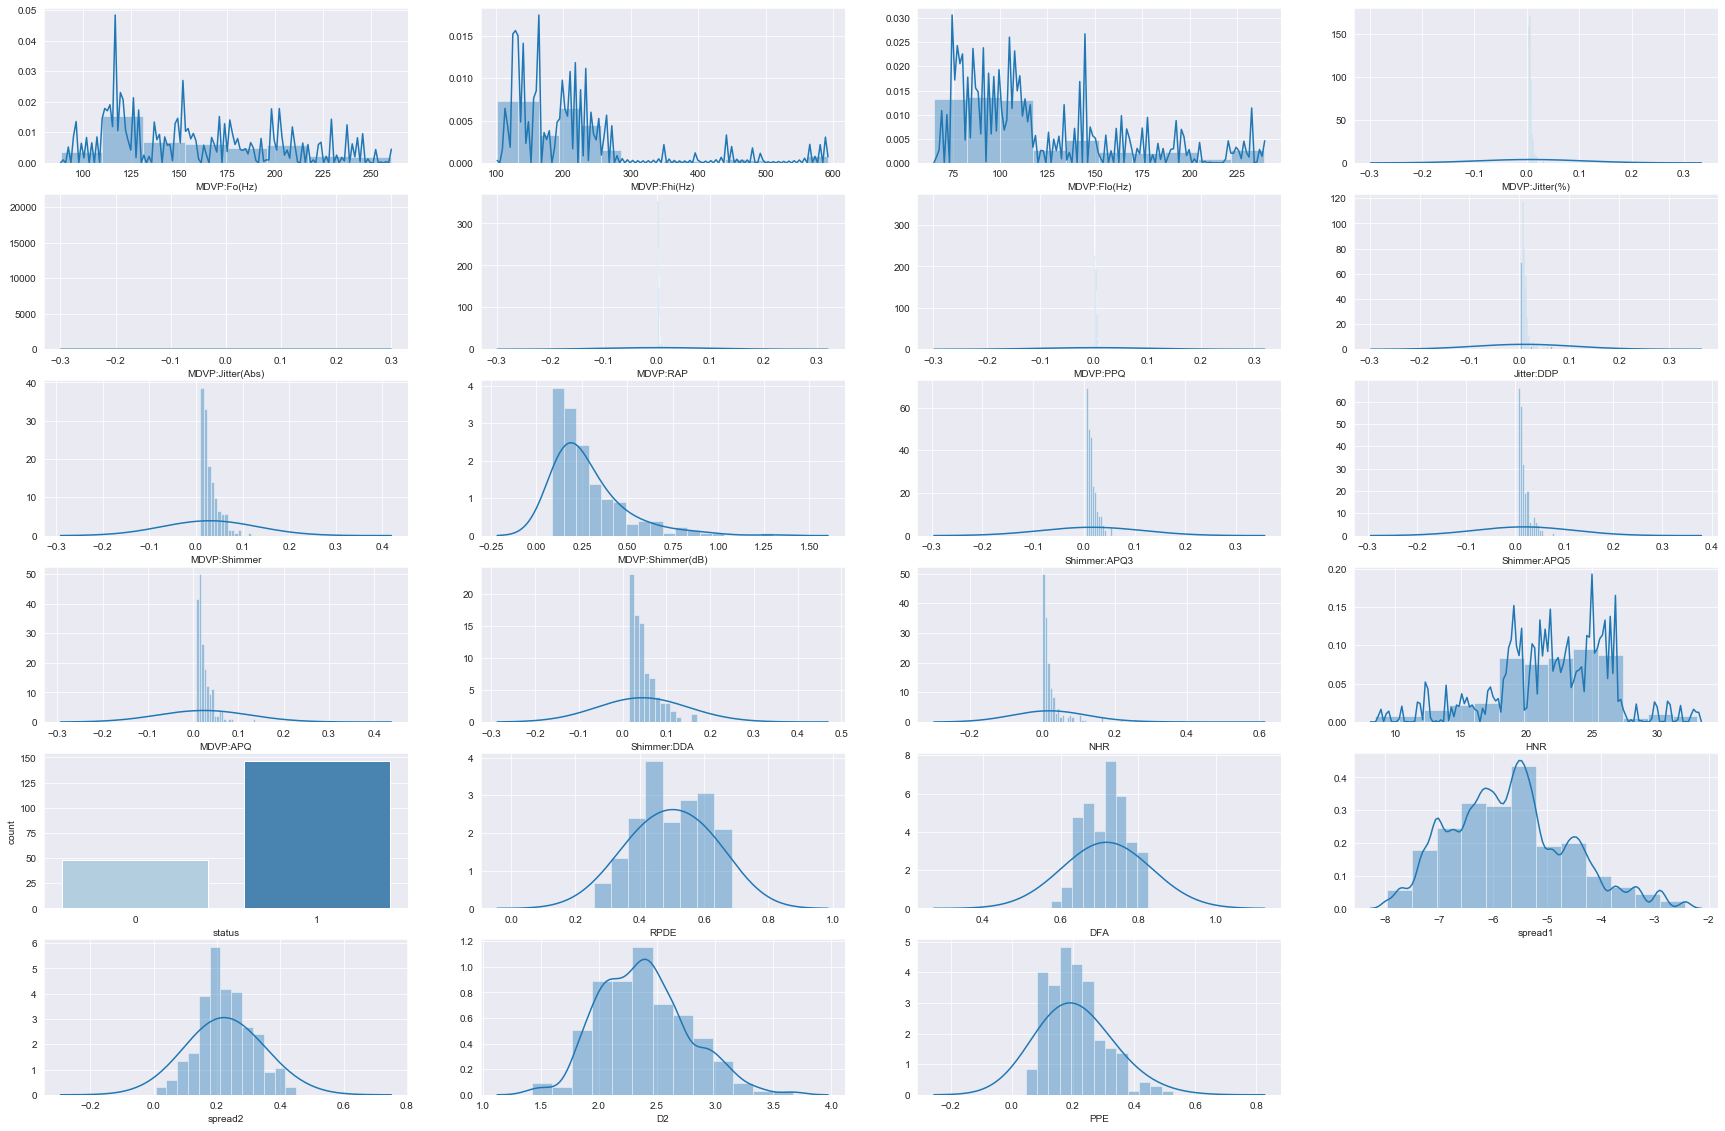

In [13]:
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in Data.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(6, 4, pos)   # plot grid
    if feature in ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']:   # Plot histogram for all the continuous columns
         sns.distplot(Data[feature], kde= True, kde_kws={'bw': 0.1} )
    else:
        sns.countplot(Data[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one  
    


* From The above observation we can see data distribution of each variable.
* Most of the variables data are left skewed and right skewed.


In [14]:
corr = Data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [1]:
#Showing correlation between each variable

corr = abs(Data.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

NameError: name 'Data' is not defined

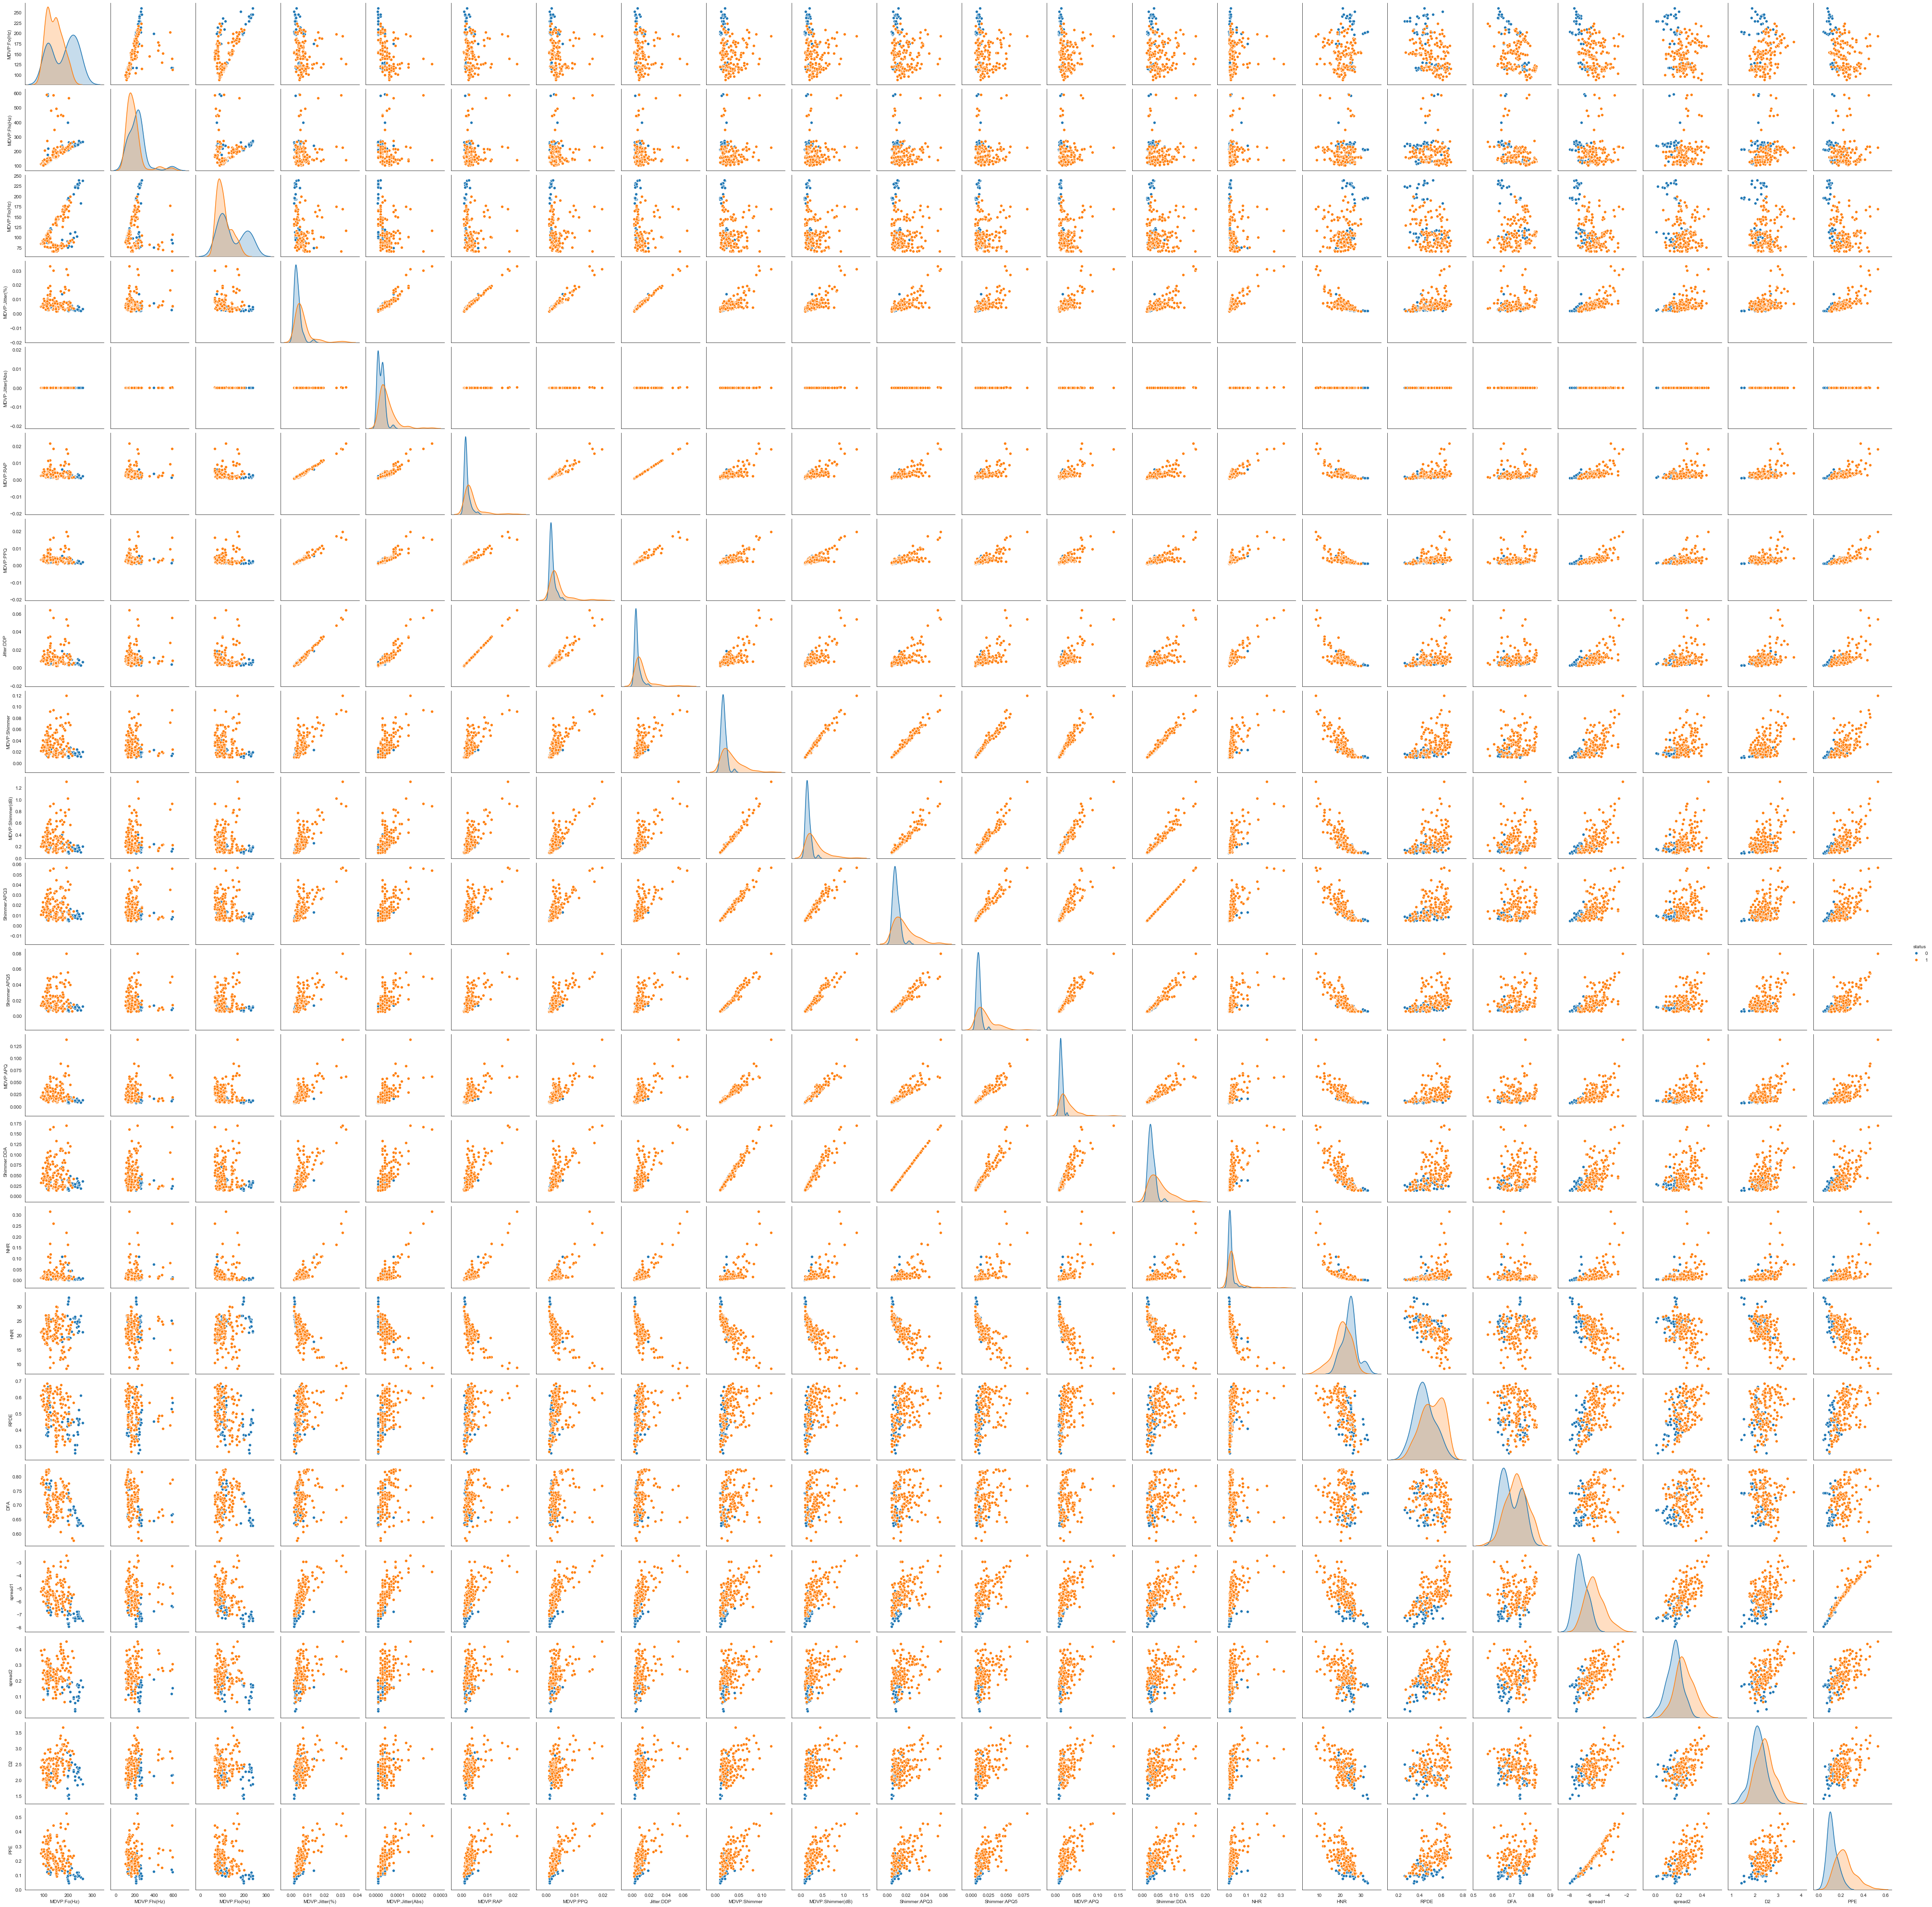

In [14]:
sns.pairplot(Data, hue = 'status', diag_kind='kde')    # pairplot
plt.show()

* From the above observation we can see that MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, NHR having strong corelation between MVDP:Jitter(%)
* MVDP:RAP, MVDP:PPQ, Jitter:DDP having strong corelation between MVDP:Jitter(Abs)
* MVDP:PPQ, Jitter:DDP having strong corelation between MVDP:RAP
* Jitter:DDP having strong corelation between MVDP:PPQ
* NHR having strong corelation between Jitter:DDP
* MVDP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MVDP:APQ, Shimmer:DDA having strong corelation between MVDP:Shimmer
* Shimmer:APQ3, Shimmer:APQ5, MVDP:APQ, Shimmer:DDA  having strong corelation between MVDP:Shimmer(dB)
* Shimmer:APQ5, MVDP:APQ, Shimmer:DDA having strong corelation between Shimmer:APQ3
* MVDP:APQ, Shimmer:DDA having strong corelation between Shimmer:APQ5
* Shimmer:DDA having strong corelation between MVDP:APQ
* PPE having strong corelation between Spred1


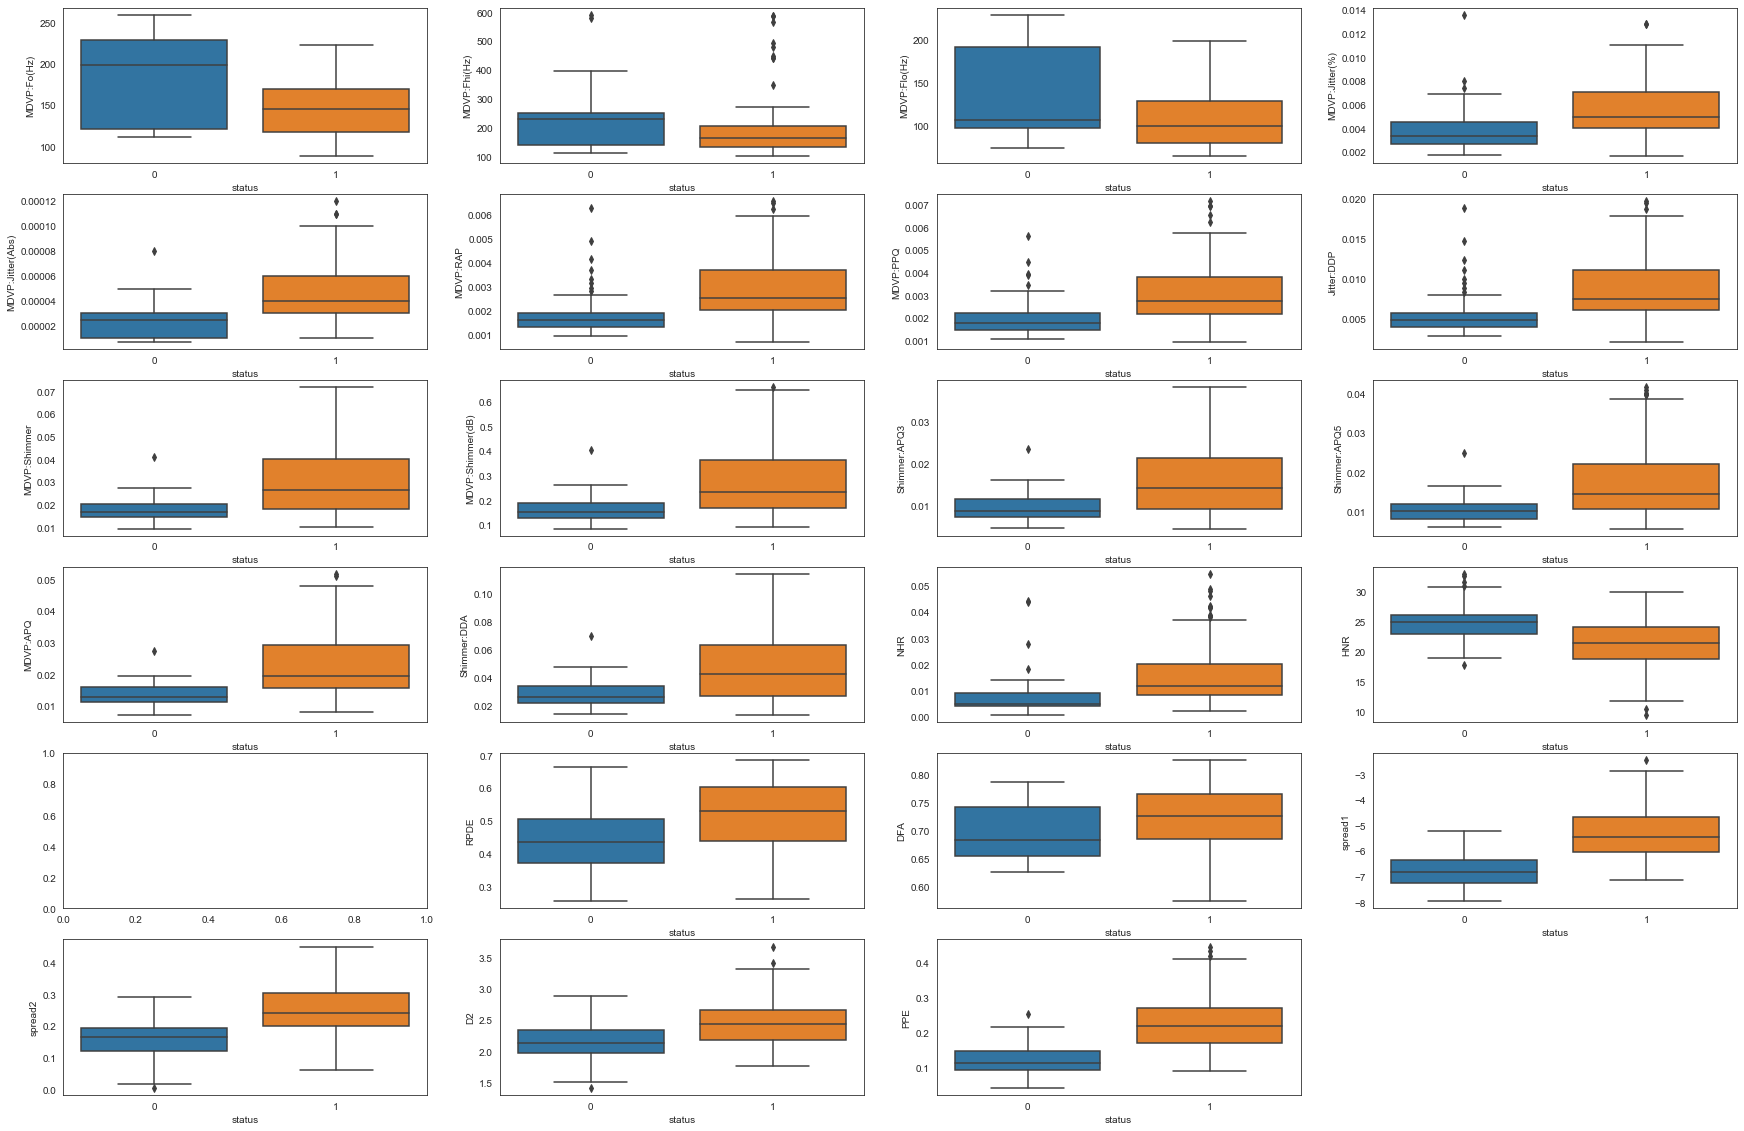

In [85]:
#Plotting boxplot for each varibale vs status to check the outliers
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
status = Data['status']
for feature in Data.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(6, 4, pos)   # plot grid
    if feature in ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']:   # Plot histogram for all the continuous columns
         sns.boxplot(x= status, y= Data[feature])
    
    pos += 1  # to plot over the grid one by one  


* From the above obesrvation we can see there are good number of outliers present  in 'MDVP:fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ'and 'NHR'

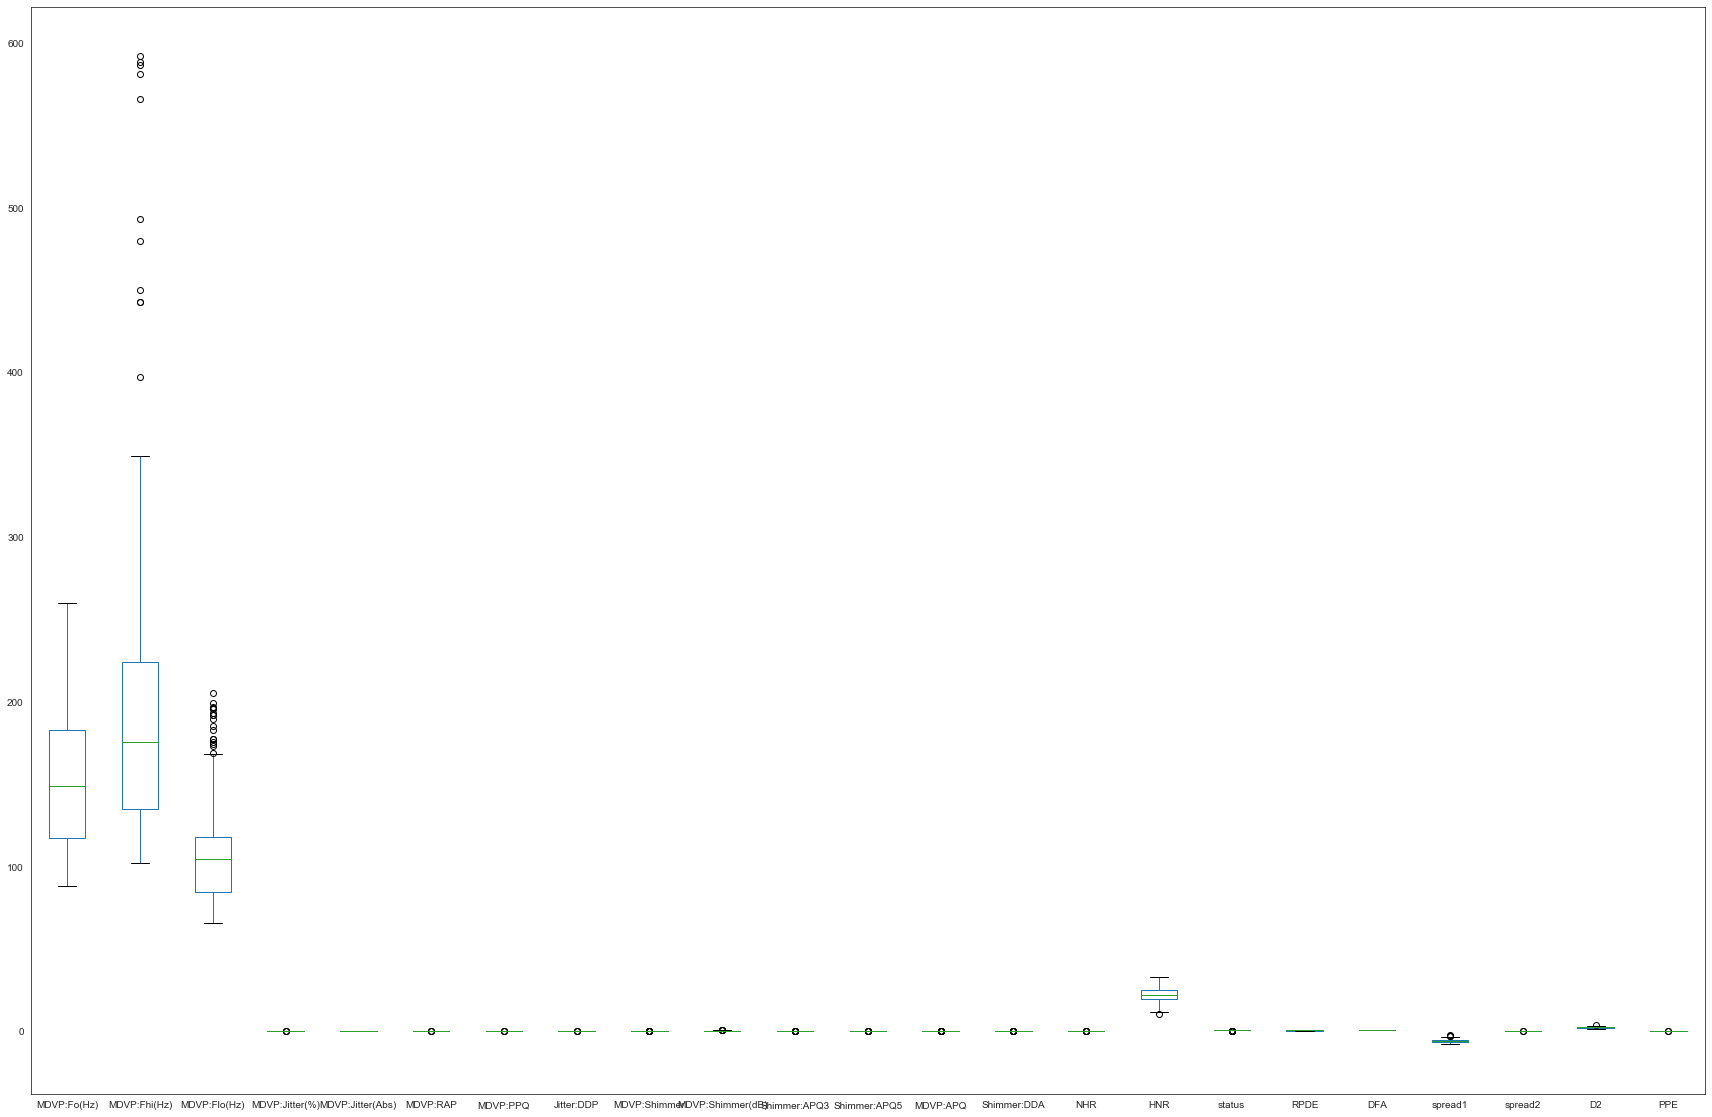

In [86]:
for column in Data.columns:
    if column in ['MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','PPE']:
        first_quartile = Data[column].quantile(0.20)
        third_quartile = Data[column].quantile(0.75)
        interquartilerange = third_quartile - first_quartile
        high = float(third_quartile + 1.5 * interquartilerange)
        low = float(first_quartile - 1.5 * interquartilerange)
        Data.loc[(Data[column]<low) | (Data[column] > high), column] = Data[column].median()
Data.plot(kind = 'box', figsize = (30,20))

In [190]:
# Splitting data into 'X' i.e Indepedant varible and y i.e Dependant variable.
X = Data.drop('status', axis = 1)
y= Data['status']


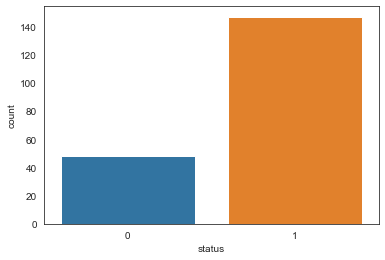

In [191]:
sns.countplot(y)

In [192]:
#As we can see in above graph that our data is imbalanced. Using Swote function to balancing the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_new,y_new = smote.fit_sample(X,y)

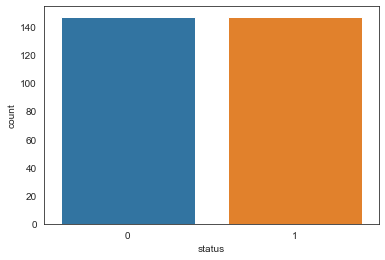

In [193]:
#After Swote Analysis Data is balanced
sns.countplot(y_new)

In [194]:
data = pd.DataFrame(X_new,columns=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'])
data['status'] = y_new

In [195]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00269,0.01394,0.06134,0.221,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00269,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00269,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.00494,0.00003,0.00250,0.00269,0.00749,0.06425,0.584,...,0.03836,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [196]:
# After using Swote analysis data size is changed.
data.shape

(294, 23)

In [197]:
#Changing the data type of 'status' variable from int to Category.
data['status'] = data['status'].astype('int').astype("category")

In [198]:
#checking null values in dataset after smote analysis.
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [199]:
#Creating dummy varible for categorical data
PData = copy.deepcopy(data)
PData = pd.get_dummies(PData,drop_first=True)
PData.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status_1
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00269,0.01394,0.06134,0.221,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00269,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00269,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.00494,0.00003,0.00250,0.00269,0.00749,0.06425,0.584,...,0.03836,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [200]:
# Splitting data into 'X' i.e Indepedant varible and y i.e Dependant variable.
X = PData[PData.columns[0:22]]
y = PData[PData.columns[22]]

In [201]:
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScal
scaler = preprocessing.MinMaxScaler((-1, 1))
X = scaler.fit_transform(X)
y= y

In [202]:
#Splitting  the data into train and test dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 4)

In [1]:
# Since we will be using multiple models using the same data, thhe following is a user defined function for that purpose 

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 4)   # compute accuracy score for test set
    
    #Printing Confusion Matrix
    cm=confusion_matrix(y_test, pred,labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    print(classification_report(y_test,pred))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score  # return all the metrics


## Training the model using standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc.

### 1. Logistic Regression Model

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        41
           1       0.93      0.79      0.85        48

    accuracy                           0.85        89
   macro avg       0.86      0.86      0.85        89
weighted avg       0.86      0.85      0.85        89


 Logistic Model Score: 0.8539


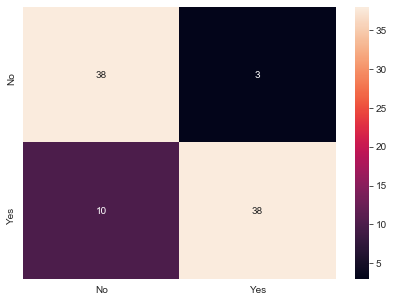

In [204]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the Training set
lr = LogisticRegression(random_state = 3)

lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)
#Printing Accuracy Score for model
print("\n Logistic Model Score:",lr_accuracy)



### 2. K Nearest Neighbors Model

In [205]:
#Let us have a look at the error rate for different k values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 0.2804490780752513
RMSE value for k=  2 is: 0.25417856237895775
RMSE value for k=  3 is: 0.24479602454484184
RMSE value for k=  4 is: 0.24859153808806278
RMSE value for k=  5 is: 0.26478738555785053
RMSE value for k=  6 is: 0.26322687840171
RMSE value for k=  7 is: 0.26140572135665147
RMSE value for k=  8 is: 0.26829151510745114
RMSE value for k=  9 is: 0.2819290307158574
RMSE value for k=  10 is: 0.2850192187488061
RMSE value for k=  11 is: 0.29069195164828276
RMSE value for k=  12 is: 0.30059242379581974
RMSE value for k=  13 is: 0.3098455341557052
RMSE value for k=  14 is: 0.3191689794178148
RMSE value for k=  15 is: 0.32529636923919053
RMSE value for k=  16 is: 0.33018763817637753
RMSE value for k=  17 is: 0.3325223731566666
RMSE value for k=  18 is: 0.3356143345431467
RMSE value for k=  19 is: 0.33751411381433005
RMSE value for k=  20 is: 0.34270077359807505


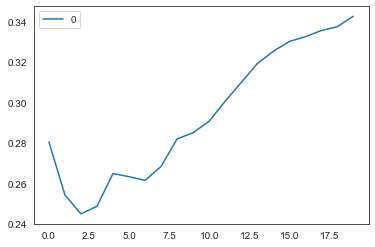

In [206]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

* As shown in above figure, the RMSE value increases as we increase the k value. At k= 7, the RMSE is approximately 0.1869, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        41
           1       1.00      0.81      0.90        48

    accuracy                           0.90        89
   macro avg       0.91      0.91      0.90        89
weighted avg       0.92      0.90      0.90        89


 KNN Model Score: 0.8989


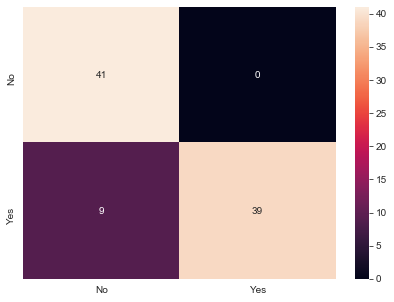

In [207]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )
print("\n KNN Model Score:",knn_accuracy)

### 3. Naive Bayes 

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        41
           1       0.80      0.67      0.73        48

    accuracy                           0.73        89
   macro avg       0.74      0.74      0.73        89
weighted avg       0.74      0.73      0.73        89


 Naive Bayes Model Score: 0.7303


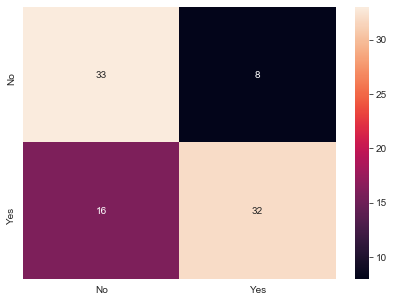

In [208]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )
print("\n Naive Bayes Model Score:",nb_accuracy)

### 4. Support Vector Machine

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        41
           1       0.97      0.77      0.86        48

    accuracy                           0.87        89
   macro avg       0.88      0.87      0.87        89
weighted avg       0.89      0.87      0.86        89


 Support Vector Machine Model Score: 0.8652


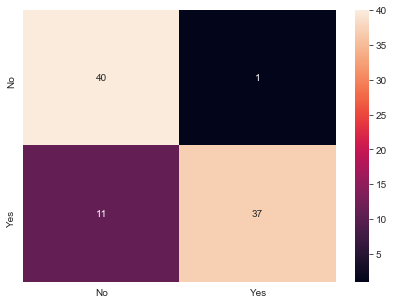

In [209]:
from sklearn import svm
svm = svm.SVC(gamma=0.025, C=3) 

svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )
print("\n Support Vector Machine Model Score:",svm_accuracy)

### 5. Decision Tree Model

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.93      0.81      0.87        48

    accuracy                           0.87        89
   macro avg       0.87      0.87      0.87        89
weighted avg       0.87      0.87      0.87        89


 Decision Tree Model Score: 0.8652


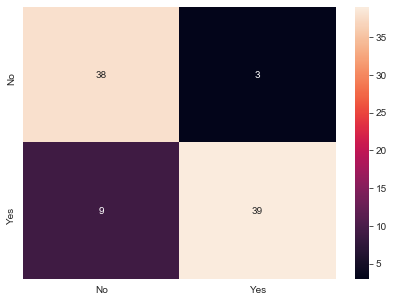

In [210]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=4)

dTree_accuracy, dTree_recall, dTree_precision, dTree_specificity, dTree_f1_score = fit_n_print(dTree, X_train, X_test, y_train, y_test )
print("\n Decision Tree Model Score:",dTree_accuracy)

## Training the model using standard Ensemble Technique

### 1. Decision Tree Model (Reducing over fitting (Regularization)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.93      0.81      0.87        48

    accuracy                           0.87        89
   macro avg       0.87      0.87      0.87        89
weighted avg       0.87      0.87      0.87        89


 Decision Tree Model with Gini Index Score: 0.8652


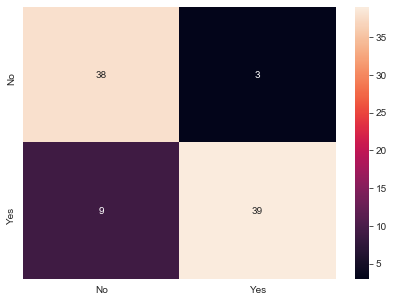

In [211]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=4)
dTreeR.fit(X_train,y_train)

dTreeR_accuracy, dTreeR_recall, dTreeR_precision, dTreeR_specificity, dTreeR_f1_score = fit_n_print(dTreeR, X_train, X_test, y_train, y_test )
print("\n Decision Tree Model with Gini Index Score:",dTreeR_accuracy)

### 2. Ensemble Learning - Bagging

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.94      0.97        48

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89


 Decision Tree Model using Bagging Score: 0.9663


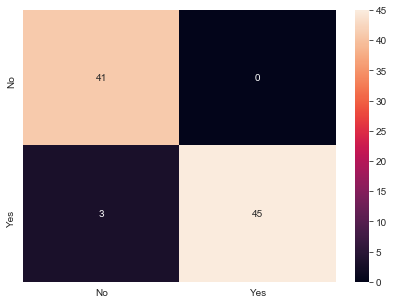

In [212]:
from sklearn.ensemble import BaggingClassifier

#bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = BaggingClassifier(n_estimators=50,random_state=4)

bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_specificity, bgcl_f1_score = fit_n_print(bgcl, X_train, X_test, y_train, y_test )
print("\n Decision Tree Model using Bagging Score:",bgcl_accuracy)

### 3. Ensemble Learning - AdaBoost

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        41
           1       0.90      0.75      0.82        48

    accuracy                           0.82        89
   macro avg       0.83      0.83      0.82        89
weighted avg       0.83      0.82      0.82        89


 Decision Tree Model using Ada Boost Score: 0.8202


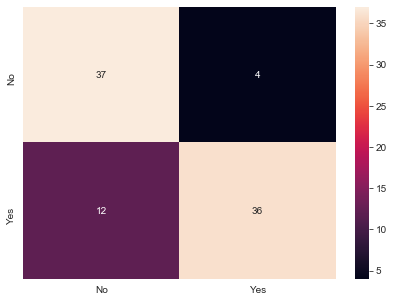

In [213]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)

abcl_accuracy, abcl_recall, abcl_precision, abcl_specificity, abcl_f1_score = fit_n_print(abcl, X_train, X_test, y_train, y_test )
print("\n Decision Tree Model using Ada Boost Score:",abcl_accuracy)

### 4. Ensemble Learning - Gradient Boost

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.94      0.97        48

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89


 Decision Tree Model using GradientBoost Score: 0.9663


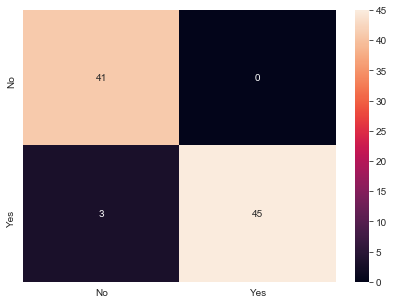

In [214]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=4)

gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_specificity, gbcl_f1_score = fit_n_print(gbcl, X_train, X_test, y_train, y_test )
print("\n Decision Tree Model using GradientBoost Score:",gbcl_accuracy)

### 5. XGBoost Classifier

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.92      0.96        48

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89


 XGBoost Model Score: 0.9551


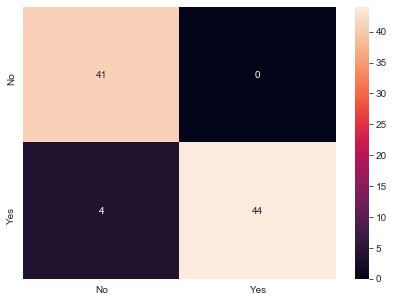

In [215]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 50,random_state=4)

xgboost_accuracy, xgboost_recall, xgboost_precision, xgboost_specificity, xgboost_f1_score = fit_n_print(xgboost, X_train, X_test, y_train, y_test )
print("\n XGBoost Model Score:",xgboost_accuracy)

### 6. KLightGBM for Classification

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.98      0.94      0.96        48

    accuracy                           0.96        89
   macro avg       0.95      0.96      0.95        89
weighted avg       0.96      0.96      0.96        89


 LightGbm Classification Model Score: 0.9551


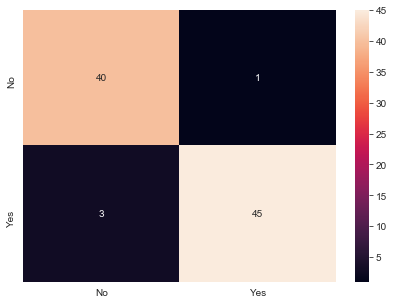

In [216]:
from lightgbm import LGBMClassifier
lightGbm = LGBMClassifier()

lightGbm_accuracy, lightGbm_recall, lightGbm_precision, lightGbm_specificity, lightGbm_f1_score = fit_n_print(lightGbm, X_train, X_test, y_train, y_test )
print("\n LightGbm Classification Model Score:",lightGbm_accuracy)

### 7. Random Forest

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.94      0.97        48

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89


 Random Forest Model Score: 0.9663


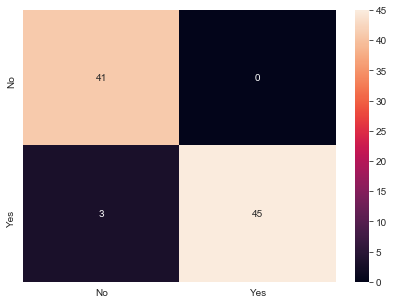

In [217]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)

rfcl_accuracy, rfcl_recall, rfcl_precision, rfcl_specificity, rfcl_f1_score = fit_n_print(rfcl, X_train, X_test, y_train, y_test )
print("\n Random Forest Model Score:",rfcl_accuracy)

## 7.Train a meta-classifier and note the accuracy on test data 

### StackingClassifier using Crossfold Variation

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.98      0.99        48

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89


 Stacking Classifier Score: 0.9888


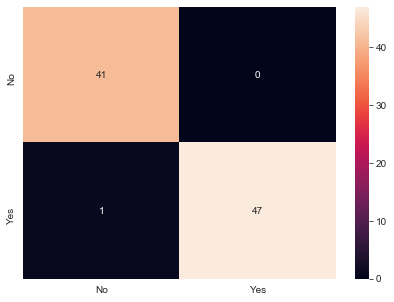

In [218]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


estimators = [('Naive Bayes', GaussianNB()),('KNN', KNeighborsClassifier(n_neighbors=5)), ('SVM', SVC(gamma=0.025, C=3)),('Random Forest',RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)),('XGBoost', XGBClassifier(n_estimators = 50,random_state=4)),('LightGBM',LGBMClassifier()),('dTree', DecisionTreeClassifier(criterion = 'entropy', random_state=4)),('Bagging Classifier',BaggingClassifier(n_estimators=50,random_state=1))]
stck = StackingClassifier(estimators=estimators)

stck_accuracy, stck_recall, stck_precision, stck_specificity, stck_f1_score = fit_n_print(stck, X_train, X_test, y_train, y_test )
print("\n Stacking Classifier Score:",stck_accuracy)

### StackingClassifier using GridSearch

In [219]:
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection


# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=4)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(n_estimators = 50,random_state=4)
clf5 = LGBMClassifier()
clf6 = BaggingClassifier(n_estimators=50,random_state=1)
clf7 = DecisionTreeClassifier(criterion = 'gini', random_state=4)


lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3,clf4,clf7], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 10],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('\n Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.907 +/- 0.04 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.907 +/- 0.04 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.917 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.917 +/- 0.03 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.907 +/- 0.04 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.907 +/- 0.04 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.912 +/- 0.04 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.912 +/- 0.04 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

## Comparing all the models 

In [220]:
result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM','Decision Tree with Entropy','Decision Tree with Gini','Bagging Classifier', 'AdaBoost Classifier','Gradient Boost Classifier','XGBoost Classifier','LightGBM Classifier', 'Random Forest', 'StackingClassifier'],
                        'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy,dTree_accuracy, dTreeR_accuracy,bgcl_accuracy,abcl_accuracy,gbcl_accuracy, xgboost_accuracy,lightGbm_accuracy, rfcl_accuracy,stck_accuracy],
                        'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall, dTree_recall,dTreeR_recall, bgcl_recall,abcl_recall, gbcl_recall, xgboost_recall, lightGbm_recall,rfcl_recall, stck_recall],
                        'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision,dTree_precision, dTreeR_precision, bgcl_precision, abcl_precision, gbcl_precision, xgboost_precision,lightGbm_precision, rfcl_precision,stck_precision],
                        'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity, dTree_specificity, dTreeR_specificity, bgcl_specificity, abcl_specificity,gbcl_specificity, xgboost_specificity,lightGbm_specificity, rfcl_specificity,stck_specificity],
                        'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score, dTree_f1_score, dTreeR_f1_score,bgcl_f1_score, abcl_f1_score,gbcl_f1_score,xgboost_f1_score, lightGbm_f1_score, rfcl_f1_score,stck_f1_score ]})
result1


,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.8539,0.792,0.927,0.927,0.854
1,KNN,0.8989,0.812,1.000,1.000,0.896
2,Naive Bayes',0.7303,0.667,0.800,0.805,0.727
3,SVM,0.8652,0.771,0.974,0.976,0.861
4,Decision Tree with Entropy,0.8652,0.812,0.929,0.927,0.867
5,Decision Tree with Gini,0.8652,0.812,0.929,0.927,0.867
6,Bagging Classifier,0.9663,0.938,1.000,1.000,0.968
7,AdaBoost Classifier,0.8202,0.750,0.900,0.902,0.818
8,Gradient Boost Classifier,0.9663,0.938,1.000,1.000,0.968
9,XGBoost Classifier,0.9551,0.917,1.000,1.000,0.957


* As we can see All models perform really well.
* In any medical application, It is very important to check the Model Precison, Specificity, Accuracy score and F1 Score.
* Form above model Knn, SVM, Bagging Classifier, random forest and Stacking Classifier is giving really good precision and specificity.
* Amongst all model Stacking Classifier performed really well in Accurcy, Precison and Specificity.
* I am choosing Stacking Classifier For detecting Parkinson’s Disease.
